In [1]:
import os
os.chdir("/home/arne/devel/PycharmProjects/recursive-dependency-embedding")
from __future__ import print_function
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import spacy
from preprocessing import read_data, read_data2, sentence_reader, get_word_embeddings, process_sentence2, process_sentence3, process_sentence4, addMissingEmbeddings
import constants
from IPython.display import Image
from visualize import visualize, visualize2, getFromVocs
import tools

In [2]:
nlp = spacy.load('en')
nlp.pipeline = [nlp.tagger, nlp.parser]
print('extract word embeddings from spaCy...')
vecs, mapping = get_word_embeddings(nlp.vocab)
# for processing parser output
data_maps = {constants.WORD_EMBEDDING: mapping}
data_maps2 = mapping
# data vectors
data_vecs = {constants.WORD_EMBEDDING: vecs}

extract word embeddings from spaCy...
Total time running get_word_embeddings: 6.38060903549 seconds


In [3]:
import operator
def getCounts(seq_data, vocab, vocab_neg, data_maps_reverse):
    data_counts = {}
    for data in seq_data:
        tools.incOrAdd(data_counts, data)
    #print(data_counts)
    
    d = {getFromVocs(vocab, vocab_neg, data_maps_reverse[key]): data_counts[key] for key in data_counts}
    return sorted(d.items(), key=operator.itemgetter(1), reverse=True)

In [4]:
def read_sentence(sentence, vis = False):
    seq_data, seq_types, seq_parents, seq_edges = read_data(sentence_reader, nlp, data_maps, args={'sentence': sentence})
        
    data_maps_reverse = {}
    for key in data_maps:
        data_maps_reverse[key] = tools.revert_mapping(data_maps[key])
        
    if vis == True:
        visualize('forest_temp.png', (seq_data, seq_types, seq_parents, seq_edges), data_maps_reverse, nlp.vocab)
        img = Image('forest_temp.png')
        display(img)
   
    return seq_data, seq_types, seq_parents, seq_edges


def read_sentence2(sentence, vis = False):
    seq_data, seq_parents, root = read_data2(sentence_reader, process_sentence4, nlp, data_maps2, args={'sentence': sentence})
    print('root: '+ str(root))
    
    data_maps_reverse = tools.revert_mapping(data_maps2)
    
    print('counts: '+str(getCounts(seq_data, nlp.vocab, constants.vocab_manual, data_maps_reverse)))
    #print('counts: ' + str(tools.getFromDicts(nlp.vocab, constants.vocab_manual,)))
    
        
    
        
    if vis == True:
        visualize2('forest_temp.png', (seq_data, seq_parents), data_maps_reverse, nlp.vocab, constants.vocab_manual)
        img = Image('forest_temp.png')
        display(img)
   
    return seq_data, seq_parents

In [5]:
sorted(data_maps2.values())[-10:]
len(sorted(data_maps2.values()))

1297613

add to dict: -2 -> 1297613
add to dict: -1 -> 1297614
add to dict: 365 -> 1297615
add to dict: 367 -> 1297616
add to dict: 393 -> 1297617
add to dict: 380 -> 1297618
root: 40
counts: [(u'WORD', 13), (u'EDGE', 13), (u'amod', 2), (u'.', 2), (u'ROOT', 2), (u'nsubj', 2), (u'punct', 2), (u'dobj', 2), (u'is', 1), (u'martial', 1), (u'arts', 1), (u'monkey', 1), (u'I', 1), (u'aux', 1), (u'A', 1), (u'very', 1), (u'advmod', 1), (u'practicing', 1), (u'like', 1), (u'this', 1), (u'shy', 1), (u'det', 1)]


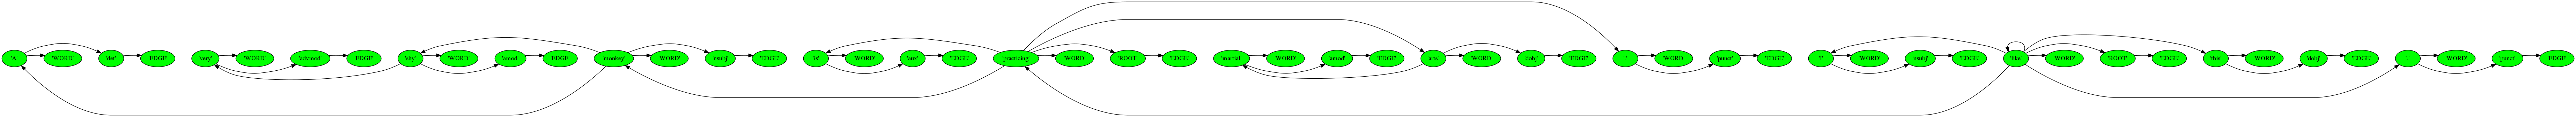

TypeError: 'NoneType' object is not iterable

In [6]:
(seq_data, seq_parents) = read_sentence2('A very shy monkey is practicing martial arts. I like this.', True) 
new_embeddings, added_count = addMissingEmbeddings(seq_data, vecs)
#new_embeddings, added_count = addMissingEmbeddings(seq_data, new_embeddings)
#vecs = new_embeddings



In [25]:
import numpy as np
def calc_embedding_avg(seq):
    seq_data, seq_types, seq_parents, seq_edges = seq
    e = np.zeros(nlp.vocab.vectors_length) # TODO: check dim of embeddings!
    for i in range(len(seq_data)):
        e += data_vecs[seq_types[i]][seq_data[i]]
    return e / len(seq_data) # average

In [26]:
calc_embedding_avg(read_sentence('A very shy monkey is practicing martial arts.'))

array([  1.07410002e-02,   1.04797661e-01,  -9.15853009e-02,
        -5.72742199e-02,   1.87026666e-01,  -2.82920011e-02,
         3.37927755e-02,  -1.95071244e-01,  -3.40955622e-03,
         2.12087999e+00,  -1.69830299e-01,   1.09519947e-02,
        -6.34260000e-02,  -1.11622448e-01,  -1.12552635e-02,
         1.59957554e-01,   1.04001443e-01,   8.65459439e-01,
        -2.38412996e-01,   5.50149985e-02,  -7.51673329e-02,
        -1.80346219e-01,  -8.34840544e-02,  -1.11868726e-01,
         8.09453333e-02,  -6.86778910e-02,  -1.04682251e-02,
        -4.30825555e-02,   6.12711095e-02,  -2.60911190e-01,
        -4.86684436e-02,   4.19144664e-03,   1.84042576e-01,
        -2.16793002e-01,   1.31033664e-01,  -8.43688916e-02,
         6.11080002e-02,  -5.91083342e-02,  -1.17230153e-01,
        -3.09220557e-01,   1.51952467e-01,   1.42462335e-01,
         1.21541668e-01,  -3.40155537e-02,   2.18288891e-01,
         2.27417561e-01,  -7.52422234e-02,   5.98678859e-02,
        -1.67224473e-02,

In [29]:
doc = nlp(u"Apples and oranges are ASdjkhaksdhkahd. Boots and hippos aren't.")

apples = doc[0]
oranges = doc[2]
boots = doc[6]
hippos = doc[8]

In [31]:
doc[4].orth

1510419

In [32]:
doc2 = nlp(u"Hello you ASdjkhaksdhkahd.")
doc2[2].orth

1510419

In [33]:
len(doc.vocab)

1297627

In [ ]:
#TODO: